## Chapter 15

In this chapter we review the key notions of *shattering* and describe why under it one has better probabilistic estimates of the correctness of machine learning algorithms.

The discussion of shattering follows {cite}`Abu-Mostafa2012-ah` pp. 41 ff and Simon {cite}`Simon2015-cm` Chapter 7. (It was discovered again by Shelah in his study of NIP theories, see Simon for bibliographic information).

We mostly restrict ourselves to giving intuitive definitions and simple proofs, which are made simpler by giving less precise estimates than what one gets the above sources.

## Shattering

The key idea is that shattering is notion according to which there are few propositions which one can form from worlds. Here we are keeping with the terminology introduced at the end the last chapter, where propositions are conceived as sets of worlds.

### An illustration

Suppose that one has $n$ points on the Euclidean plane.

There are $2^n$ many subsets of these points.

But how many of them can one generate via lines?

For instance, consider $n=5$ and a pentagon of five points, as displayed below, and consider the corner points marked with blue and red circles. There is no way to have a line such that the only points above the line are these: for, once you have a line with both of them above it, the top point of the pentagon will also be above it.

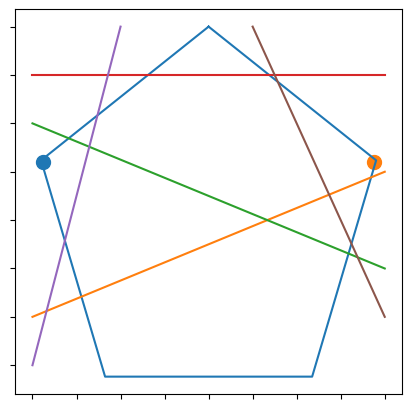

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of sides
n = 5

# Define the radius
r = 1

# Define the angles, starting from -pi/2 to make the pentagon symmetric around the y-axis
angles = np.linspace(-np.pi/2, 3*np.pi/2, n+1, endpoint=True)

# Define the x and y coordinates
x = r * np.cos(angles)
y = r * np.sin(angles)

# Create a plot
plt.figure(figsize=(5,5))
plt.plot(x, y)

plt.plot([-1, 1], [.5, -0.25])
plt.plot([-1, 1], [-.5, 0.25])
plt.plot([-1, 1], [-.75, -0.75])
plt.plot([-1, -.5], [.75, -1])
plt.plot([.25,1], [-1, .5])

plt.scatter(-.94,-.30, s=100, label = "ω_1")
plt.scatter(.94,-.30, s=100, label = "ω_2")


plt.gca().invert_yaxis()

# Hide the x-axis and y-axis labels
plt.gca().set(xticklabels=[], yticklabels=[])


# Show the plot
plt.show()

### Core notions: shattering and break points

Suppose $\Omega$ is a set of worlds and $\mathcal{P}\subseteq \{A\subseteq \Omega\}$ is a set of propositions.

*Definition*. For a subset $\Omega_0\subseteq \Omega$, we define the induced set of propositions $\mathcal{P}\upharpoonright \Omega_0 = \{A\cap \Omega_0: A\in \mathcal{P}\}$. Note that $\mathcal{P}\upharpoonright \Omega_0\subseteq  \{A\subseteq \Omega\}$.

*Definition*. A subset $\Omega_0$ of worlds of size $k$ is *$\mathcal{P}$-shattered* if there are $2^k$-many propositions in $\mathcal{P}\upharpoonright \Omega_0$.

*Definition*. A number $k\geq 1$ is *$\mathcal{P}$-break point* if there is no $k$-element subset which is $\mathcal{P}$-shattered.

The notion of VC-dimension (see next Chapter) could be defined at this stage, but we put it off for a bit so as not to overload on definitions. 

*Example*. If $\Omega$ is the real numbers and $\mathcal{P}$ are the sets defined by lines, then our pentagon example showed that 5 is a $\mathcal{P}$-break point. With a little effort along the same lines, one can show that 4 is also a $\mathcal{P}$-break point.

## Main result

Apriori one might have thought that it would be possible for 5 to be a $\mathcal{P}$-break point but for 8 not to be a $\mathcal{P}$-break point. But in fact this is not the case. We can put a finer point on this if we define the quantity 

*Definition*. The number $m_{\mathcal{P}}(n)$ is the maximum size $\mathcal{P}\upharpoonright \Omega_0$ as $\Omega_0$ ranges over $n$-element sets of worlds. In an equation:

$$m_{\mathcal{P}}(n)=\max\{\left|P\upharpoonright \Omega_0\right|: \left|\Omega_0\right|=n\}$$

*Remark*. Hence $k$ is a $\mathcal{P}$-break point iff $m_{\mathcal{P}}(k)<2^k$.

Then we have following important result:

*Corollary*. If $k\geq 1$ is a $\mathcal{P}$-break point, then for all $n\geq k$ one has $m_{\mathcal{P}}(n)\leq c\cdot n^{k-1}$ for some constant $c>0$.

We give the proof in a moment. Note that this implies that if $k$ is a $\mathcal{P}$-break point, then $n$ is a $\mathcal{P}$-break point for all $n\geq k$. This is because $n^{k-1}$ is far smaller than $2^n$ when $k\geq n$.


### Auxiliary definition used for counting

To prove the result, we define:

*Definition*. For $n\geq k$ we define $B_{\mathcal{P}}(n,k)$ as the maximum size of the $\mathcal{Q}\subseteq \mathcal{P}\upharpoonright \Omega_0$ such that $\Omega_0$ has $n$-elements and no $k$-element subset is $\mathcal{Q}$-shattered.

We abbreviate $B_{\mathcal{P}}(n,k)$ as $B(n,k)$ when $\mathcal{P}$ is clear from context.

We need to prove one very difficult proposition.

### Proposition 

For $n\geq k>1$, one has $B(n,k)\leq B(n-1,k)+B(n-1, k-1)$

*Proof*:

Suppose that $B(n,k)$ is given by the size of $\mathcal{Q}\subseteq \mathcal{P}\upharpoonright \Omega_0$ such that $\Omega_0$ has $n$-elements and no $k$-element subset is $\mathcal{Q}$-shattered.

Let $\Omega_1$ be an $(n-1)$-element subset of it. Note that 

($\star$) no $k$-element subset of $\Omega_1$ is $\mathcal{Q}$-shattered, since this would be a $k$-element subset of $\Omega_0$ which was $\mathcal{Q}$-shattered.

Some propositions $\mathcal{Q}_1$ in $\mathcal{Q}\upharpoonright \Omega_1$ will extend to only one proposition in $\mathcal{Q}$, and others $\mathcal{Q}_2$ will extend to two propositions in $\mathcal{Q}$.

Say that there are $\ell$ of the first and $m$ of the second. 

Hence the number of propositions in $\mathcal{Q}$ is $\ell+2m= \ell+m+m$.

And the number of propositions in $\mathcal{Q}\upharpoonright \Omega_1$ is $\ell+m$. 

Thus $\ell+m\leq B(n-1,k)$ by ($\star$).

Let $\Omega_2$ be a $(k-1)$-element subset of $\Omega_1$. Then $\Omega_2$ is not $\mathcal{Q}_2$-shattered:  for, if so then these $2^{k-1}$ many propositions can be extended to $2\cdot 2^{k-1}=2^k$ many propositions in $\mathcal{Q}$.

Then $m\leq B(n-1,k-1)$


### Proposition

For $n\geq k\geq 1$, one has $B(n,k)\leq c\cdot n^{k-1}$, where $c=B(2,2)$.

*Proof*

For $k=1$, we have $B(n,k)=1$.

For $k=2$ we argue by induction on $k\geq 2$. The case of $k=2$ is by definition of $c$.

For the induction step, suppose it holds for $n\geq k$; we show it holds for $n+1$. By the previous proposition and induction hypothesis we have

$B(n+1,k)\leq B(n,k)+B(n,k-1)\leq c\cdot n^{k-1}+c\cdot n^{k-2}\leq c\cdot (n+1)^{k-1}$

where the latter follows by the binomial theorem. 

Now we argue by induction on $k\geq 1$ that for all $n\geq k$ we have $B(n,k)\leq c\cdot n^{k-1}$. We just did the two base cases. Suppose it holds for $k\geq 2$; we show it holds for $k+1$. For the base case of $n=k+1$, one has $B(k+1,k+1)\leq 2^{k+1}\leq (k+1)^k = n^{k}$, where the second inequality follows from $k\geq 2$. The induction step follows as up above using the previous proposition.


### Proof of corollary

Now we can prove our corollary

*Corollary*. If $k\geq 1$ is a $\mathcal{P}$-break point, then for all $n\geq k$ one has $m_{\mathcal{P}}(n)\leq c\cdot n^{k-1}$ for some constant $c>0$.

*Proof*: Suppose that $k\geq 1$ is a $\mathcal{P}$-break point. Suppose $n\geq k$. Suppose that $m_{\mathcal{P}}(n)$ is the size of $\mathcal{Q}=\mathcal{P}\upharpoonright \Omega_0$. Since $k$ is a break point, no $k$-element subset is $\mathcal{Q}$-shattered. Then $m_{\mathcal{P}}(n)\leq B(n,k)\leq c\cdot n^{k-1}$.


## Shattering and probability

Suppose $k\geq 1$ is $\mathcal{P}$-break point. 

Suppose that $\epsilon>0$ is a small error term. 

For $A$ in $\mathcal{P}\upharpoonright \Omega_n$ and $n\geq 0$, suppose that we have an intuitive notion of $A$ being at least $\epsilon$-wrong about the points in $\Omega_n$. Here, being wrong means misclassification.

Suppose that we describe this event as $\mathrm{Error}_{n}(A)$, where we suppress the $\epsilon$ for the sake of readibility. 

The famous limiting theorems of probability like Strong Law of Large Numbers say that so long as our points are chosen independently, we can be sure that 

$$P(\mathrm{Error}_{n}(A))\leq 2\cdot e^{-2\epsilon^2 n}$$

(In fact, it is a finite version of the Strong Law of Large Numbers which is operative here, namely the Höffding inequality).

Then we can estimate as follows using the Corollary:

$P(\bigcup_{A\in \mathcal{P}\upharpoonright \Omega_n} \mathrm{Error}_{n}(A))$

$\leq \sum_{A\in \mathcal{P}\upharpoonright \Omega_n} P(\mathrm{Error}_{n}(A))$ by subadditivity

$\leq m_{\mathcal{P}}(n) \cdot 2\cdot e^{-2\epsilon^2 n}$ by previous estimate

$\leq c\cdot n^{-k} \cdot 2\cdot e^{-2\epsilon^2 n}$ by Corollary

This expression goes to zero as $n$ goes to infinity. 

Hence, given a small number like $.0005$, we can calculate $n_0$ such that for all $n\geq n_0$, we have

$P(\bigcup_{A\in \mathcal{P}\upharpoonright \Omega_n} \mathrm{Error}_{n}(A)) \leq .0005$

It is important that we do this for the union rather than for the individual $\mathrm{Error}_{n}(A)$, **since we don't know before seeing the data points which $A$ our algorithm is going to choose**.
